In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.dvidtt.046001-046912.nc')

In [3]:
pwd

'/scratch/user/xiliangdiao/plot-PI'

In [4]:
plotvar = data.variables['dvidtt'][:,0:600,0:3600]
lont = data.variables['TLON'][0:600,0:3600]
latt = data.variables['TLAT'][0:600,0:3600]
aveplot = np.nanmean(plotvar,axis=0)


In [5]:
# 63-68,,, 
lont2 = lont[247:365,1100]
latt2 = latt[247:365,1100]
lont3 = lont[247:365,800]
latt3 = latt[247:365,800]
lont4 = lont[247,800:1100]
latt4 = latt[247,800:1100]
lont5 = lont[365,800:1100]
latt5 = latt[365,800:1100]

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'spacing'
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


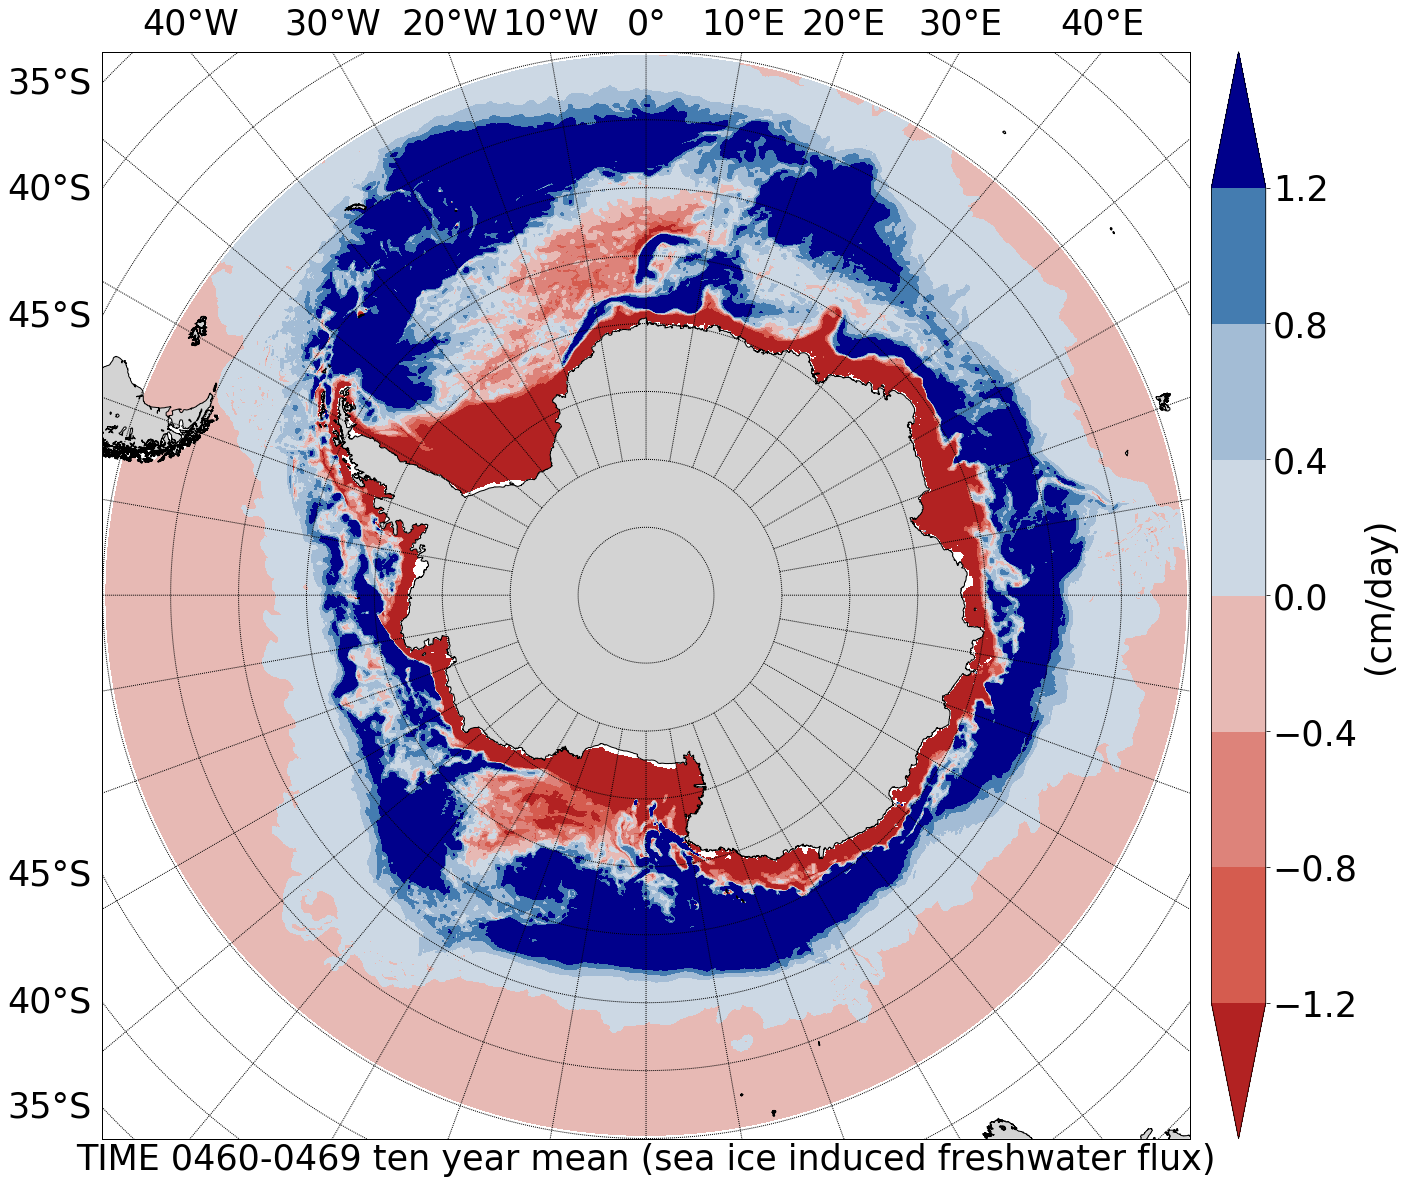

In [6]:
nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
#lev_cmap = nice_cmap([1,30,50,70,80,100,130,140,150,170,190,210,230,240]) 
lev_cmap = nice_cmap([240,230,210,190,170,140,130,100,80,70,50,30,1])
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [-1.2,-0.8,-0.4,0,0.4,0.8,1.2]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'35'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
                     width = 8900000,height = 8900000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,-aveplot*10,levels = nice_levels,cmap = new_cmap,norm =norm,spacing = 'uniform',extend='both')
CP.cmap.set_over('darkblue')
CP.cmap.set_under('firebrick')


x2,y2=map(lont2,latt2)
#map.plot(x2,y2,'yellow',linewidth=2)
x3,y3=map(lont3,latt3)
#map.plot(x3,y3,'yellow',linewidth=2)
x4,y4=map(lont4,latt4)
#map.plot(x4,y4,'yellow',linewidth=2)
x5,y5=map(lont5,latt5)
#map.plot(x5,y5,'yellow',linewidth=2)
#CS=map.contour(x,y,plotvar,[700],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=35)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP,extendfrac='auto',ticks=nice_levels)
#cbar.minorticks_on()
cbar.ax.tick_params(labelsize=35) 
cbar.set_label('(cm/day)', **my_font)
plt.xlabel("TIME 0460-0469 ten year mean (sea ice induced freshwater flux)",**my_font)
plt.savefig("460year.png",bbox_inches='tight')

In [7]:
data2=nc.Dataset('B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.dvidtt.043001-043912.nc')

In [8]:
plotvar2 = data2.variables['dvidtt'][:,0:600,0:3600]
aveplot2 = np.nanmean(plotvar2,axis=0)

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'spacing'


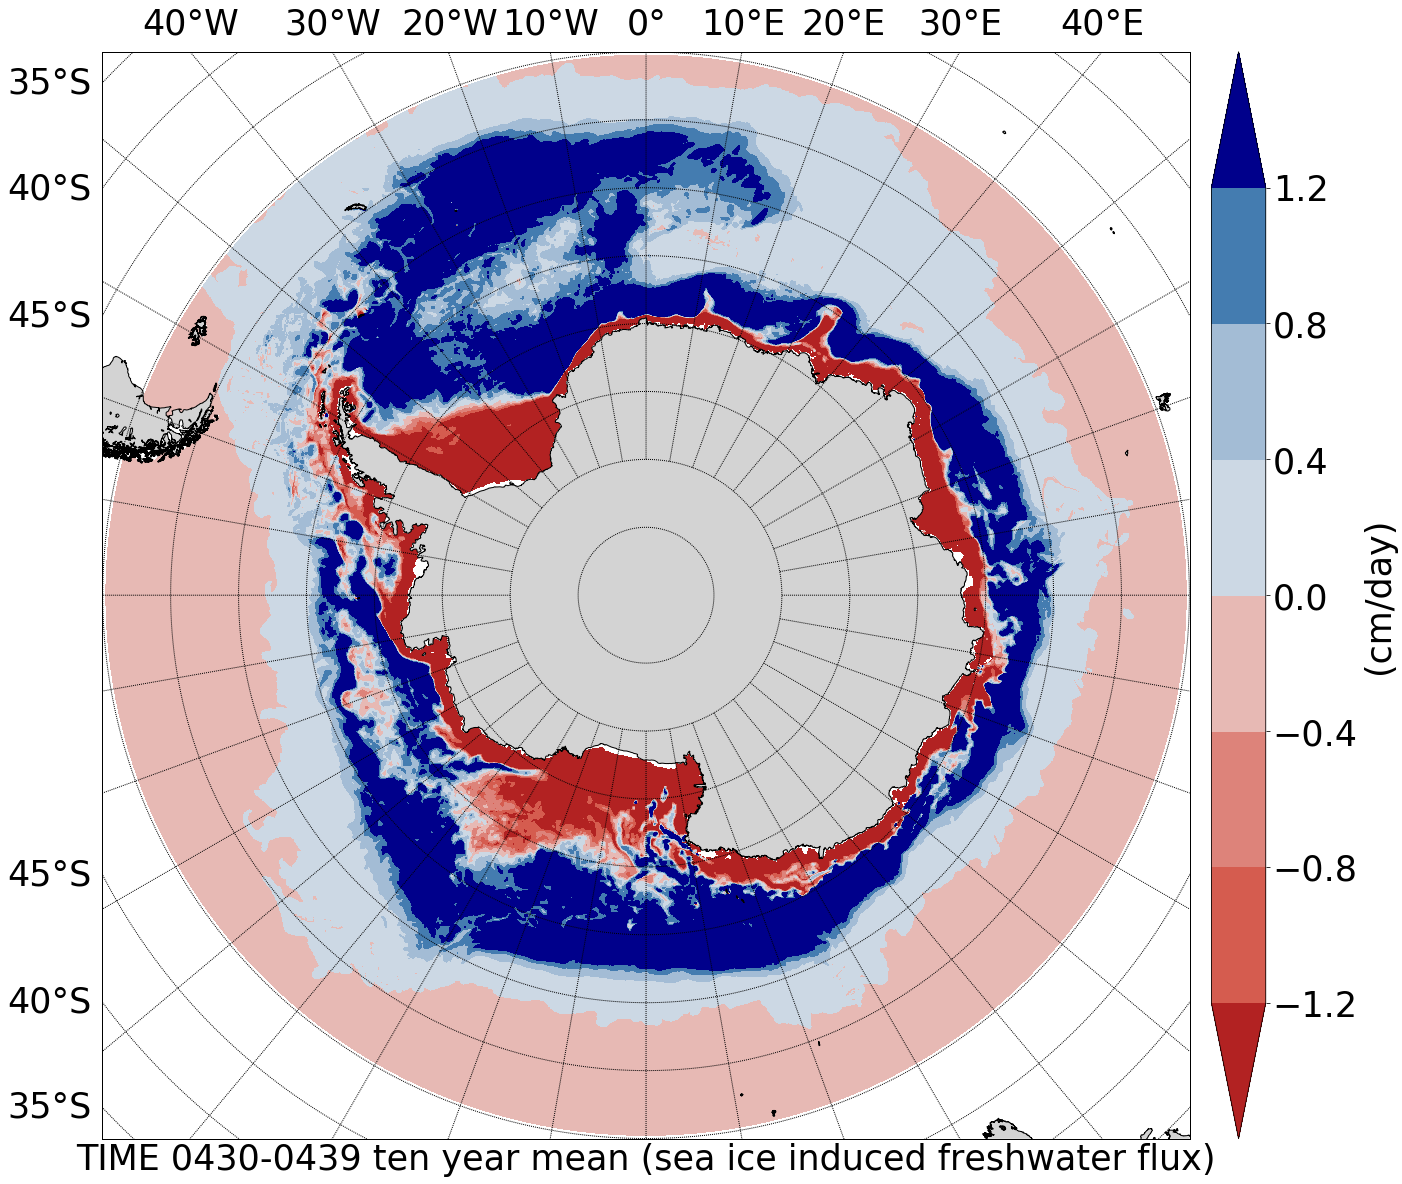

In [9]:
nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
#lev_cmap = nice_cmap([1,30,50,70,80,100,130,140,150,170,190,210,230,240]) 
lev_cmap = nice_cmap([240,230,210,190,170,140,130,100,80,70,50,30,1])
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [-1.2,-0.8,-0.4,0,0.4,0.8,1.2]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'35'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
                     width = 8900000,height = 8900000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,-aveplot2*10,levels = nice_levels,cmap = new_cmap,norm =norm,spacing = 'uniform',extend='both')
CP.cmap.set_over('darkblue')
CP.cmap.set_under('firebrick')

x2,y2=map(lont2,latt2)
#map.plot(x2,y2,'yellow',linewidth=2)
x3,y3=map(lont3,latt3)
#map.plot(x3,y3,'yellow',linewidth=2)
x4,y4=map(lont4,latt4)
#map.plot(x4,y4,'yellow',linewidth=2)
x5,y5=map(lont5,latt5)
#map.plot(x5,y5,'yellow',linewidth=2)

#CS=map.contour(x,y,plotvar,[700],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=35)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP,extendfrac='auto',ticks=nice_levels)
#cbar.minorticks_on()
cbar.ax.tick_params(labelsize=35) 
cbar.set_label('(cm/day)', **my_font)
plt.xlabel("TIME 0430-0439 ten year mean (sea ice induced freshwater flux)",**my_font)
plt.savefig("430year.png",bbox_inches='tight')

In [10]:
ww2 = np.loadtxt("dvi.out")
wspxx = np.loadtxt("wspxx2.out")
mrpxx = np.loadtxt("mrpxx2.out")

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:43: UserWarning: The following kwargs were not used by contour: 'spacing'
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:68: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:81: UserWarning: The following kwargs were not used by contour: 'spacing'
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


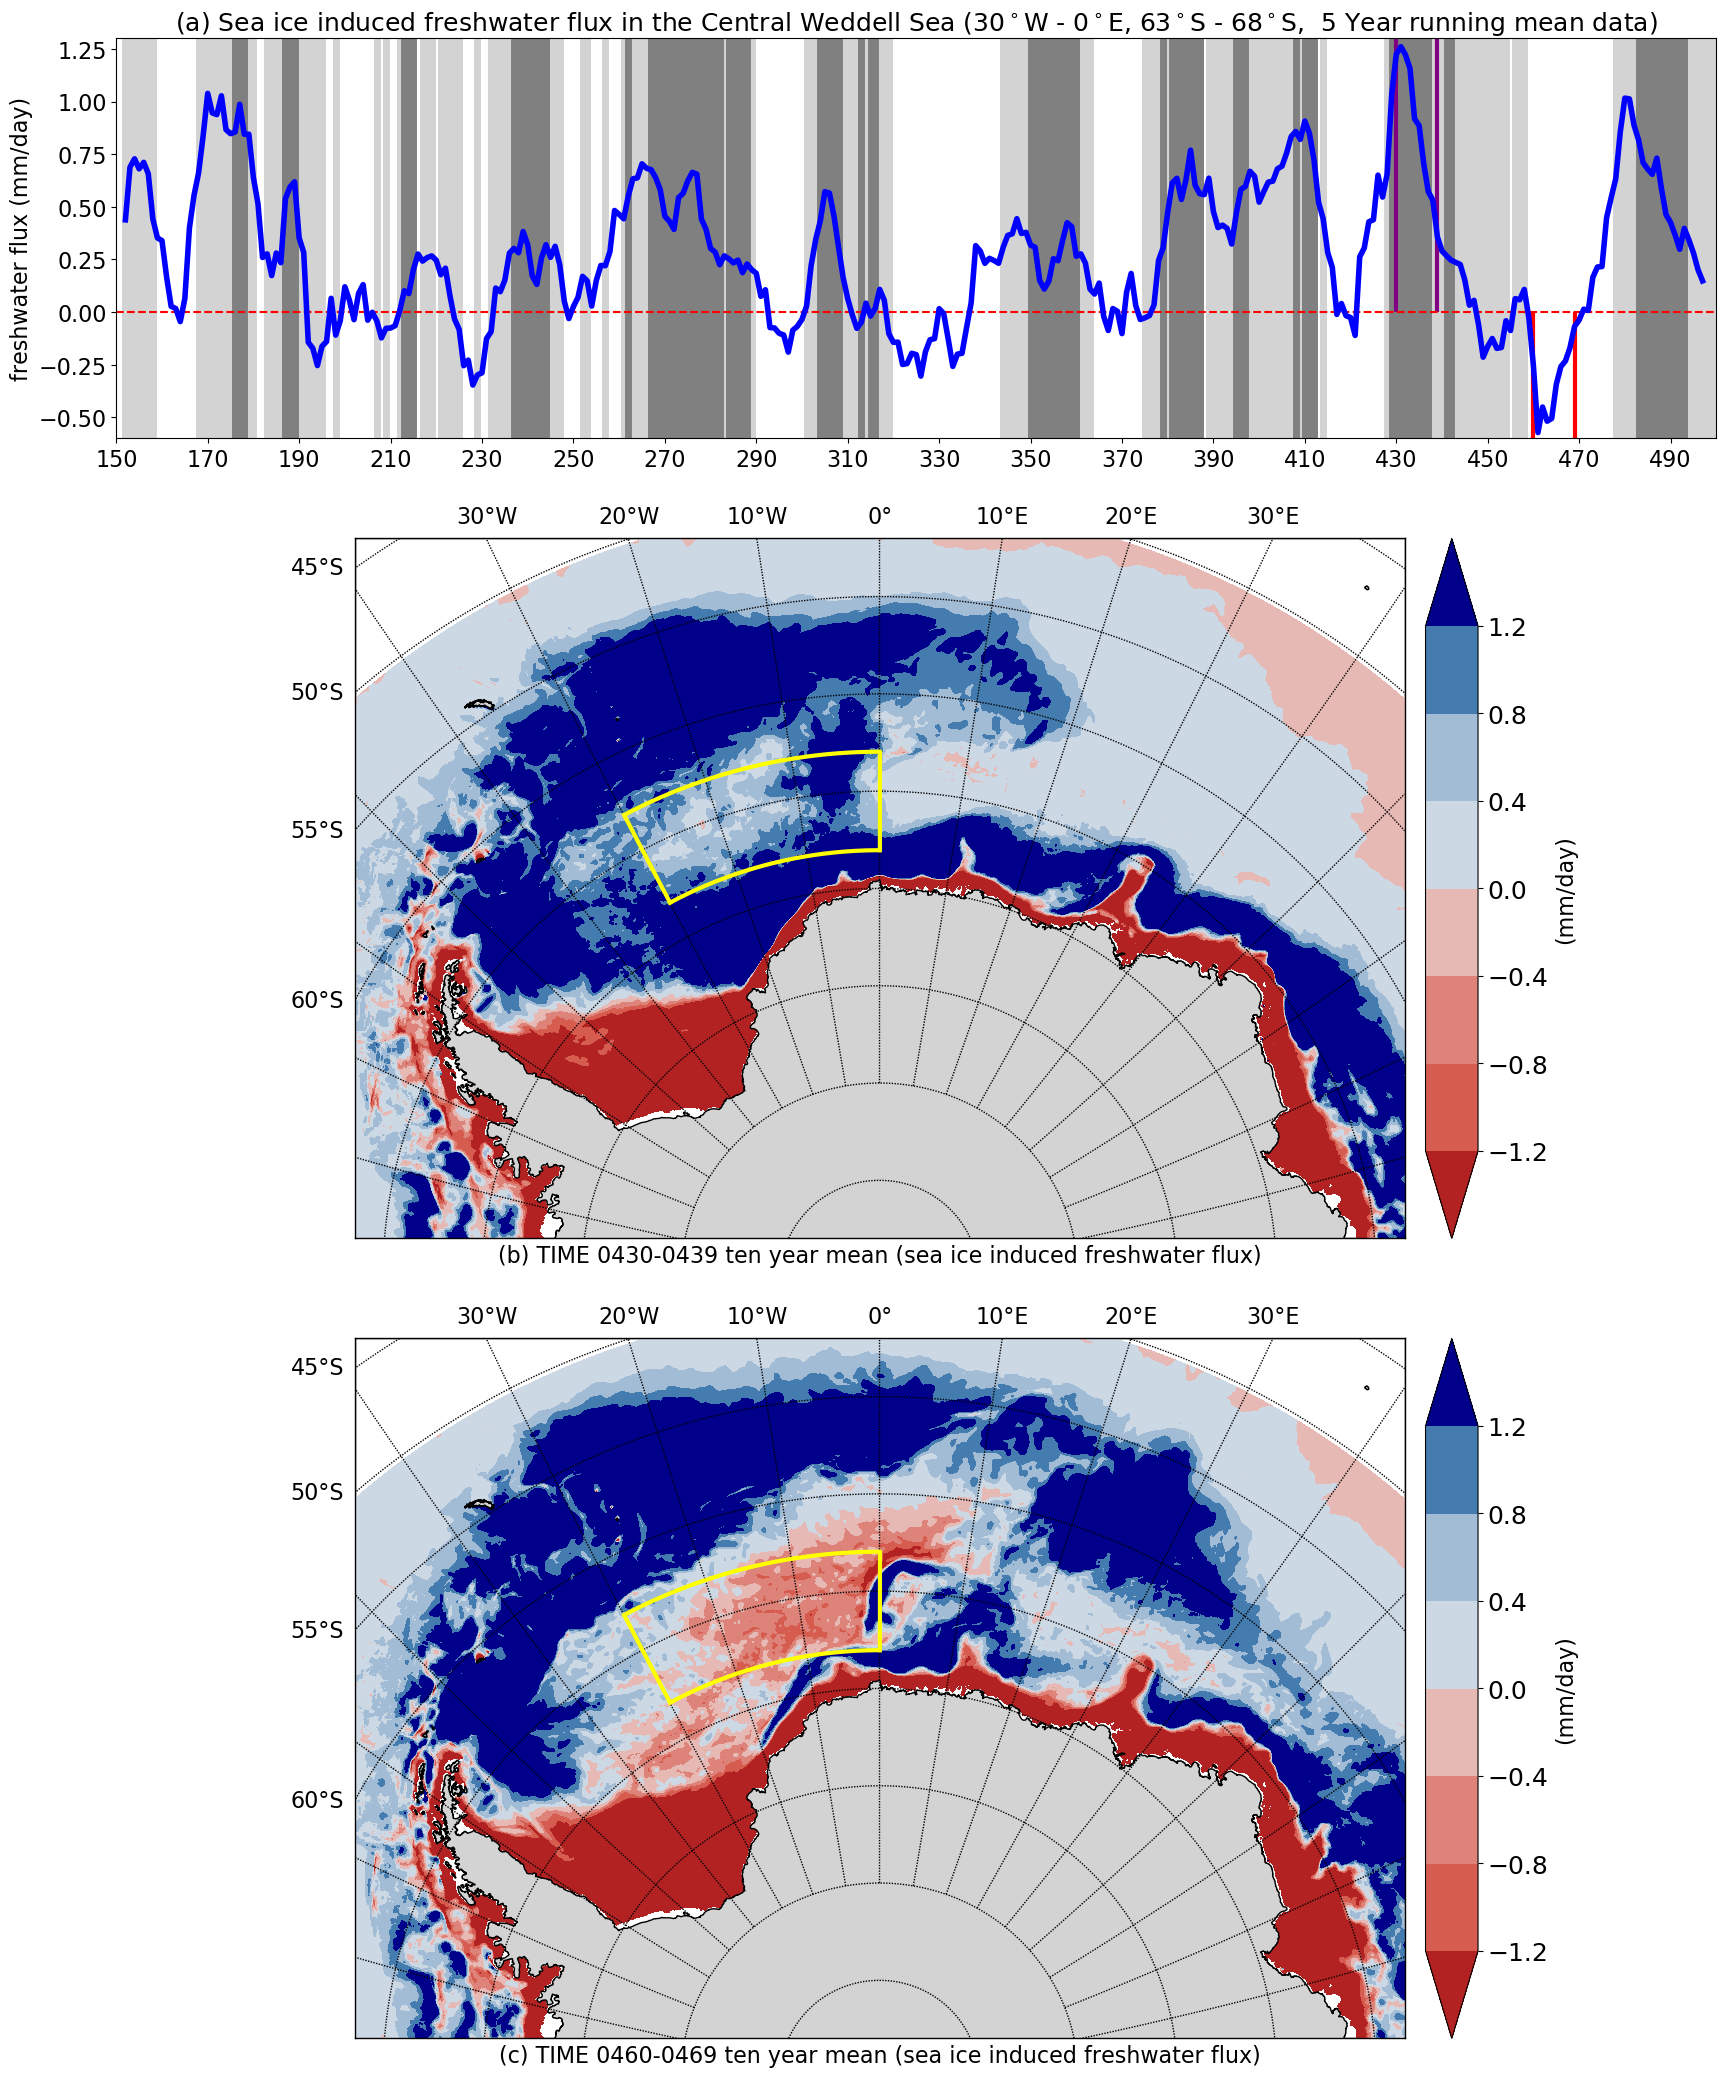

In [11]:
t = np.arange(2,348,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,20), dpi=100)
ax1 = fig.add_axes([0.1, 0.9, 0.8, 0.2],
                    xticklabels=[])
plt.vlines(mrpxx, -0.6, 1.3, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx, -0.6, 1.3, colors = "grey",linewidth=5)

plt.vlines(310, -0.6,0, colors = "red",linewidth=3)
plt.vlines(319, -0.6, 0, colors = "red",linewidth=3)

plt.vlines(280, 0, 1.3, colors = "purple",linewidth=3)
plt.vlines(289, 0, 1.3, colors = "purple",linewidth=3)

ax1.plot(t,-ww2*10,'blue',linewidth=4)
plt.hlines(0, 0, 350, colors = "red",linestyles = "dashed")
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
#plt.yticks(np.arange(-0.6,0.6,0.2), ['-0.6', '-0.4', '-0.2', '0','0.2','0.4','0.6'],**my_font)
plt.yticks(**my_font)
#plt.xlabel('Years',**my_font)
plt.ylabel('freshwater flux (mm/day)',**my_font)
plt.axis("tight")
ax1.set(ylim=(-0.6, 1.3),xlim=(0, 350))
ax1.set_title('(a) Sea ice induced freshwater flux in the Central Weddell Sea (30$^\circ$W - 0$^\circ$E, 63$^\circ$S - 68$^\circ$S,  5 Year running mean data)',fontsize = '18')
#############################################################################
ax3 = fig.add_axes([0.1, 0.1, 0.8, 0.35],
                    xticklabels=[])
map = Basemap(projection='aeqd', lat_0 = -70, lon_0 = 0,area_thresh = 100,\
                     width = 6000000,height = 4000000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,-aveplot*10,levels = nice_levels,cmap = new_cmap,norm =norm,spacing = 'uniform',extend='both')
CP.cmap.set_over('darkblue')
CP.cmap.set_under('firebrick')


x2,y2=map(lont2,latt2)
map.plot(x2,y2,'yellow',linewidth=3)
x3,y3=map(lont3,latt3)
map.plot(x3,y3,'yellow',linewidth=3)
x4,y4=map(lont4,latt4)
map.plot(x4,y4,'yellow',linewidth=3)
x5,y5=map(lont5,latt5)
map.plot(x5,y5,'yellow',linewidth=3)
#CS=map.contour(x,y,plotvar,[700],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=35)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP,extendfrac='auto',ticks=nice_levels)
#cbar.minorticks_on()
cbar.ax.tick_params(labelsize=18) 
cbar.set_label('(mm/day)', **my_font)
plt.xlabel("(c) TIME 0460-0469 ten year mean (sea ice induced freshwater flux)",fontsize = '16')
################################################################
ax3 = fig.add_axes([0.1, 0.5, 0.8, 0.35],
                    xticklabels=[])
map = Basemap(projection='aeqd', lat_0 = -70, lon_0 = 0,area_thresh = 100,\
                     width = 6000000,height = 4000000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,-aveplot2*10,levels = nice_levels,cmap = new_cmap,norm =norm,spacing = 'uniform',extend='both')
CP.cmap.set_over('darkblue')
CP.cmap.set_under('firebrick')

x2,y2=map(lont2,latt2)
map.plot(x2,y2,'yellow',linewidth=3)
x3,y3=map(lont3,latt3)
map.plot(x3,y3,'yellow',linewidth=3)
x4,y4=map(lont4,latt4)
map.plot(x4,y4,'yellow',linewidth=3)
x5,y5=map(lont5,latt5)
map.plot(x5,y5,'yellow',linewidth=3)

#CS=map.contour(x,y,plotvar,[700],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=35)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP,extendfrac='auto',ticks=nice_levels)
#cbar.minorticks_on()
cbar.ax.tick_params(labelsize=18) 
cbar.set_label('(mm/day)', **my_font)
plt.xlabel("(b) TIME 0430-0439 ten year mean (sea ice induced freshwater flux)",fontsize = '16')
plt.savefig("dvidtnew.png",bbox_inches='tight')

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:43: UserWarning: The following kwargs were not used by contour: 'spacing'
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:68: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:81: UserWarning: The following kwargs were not used by contour: 'spacing'


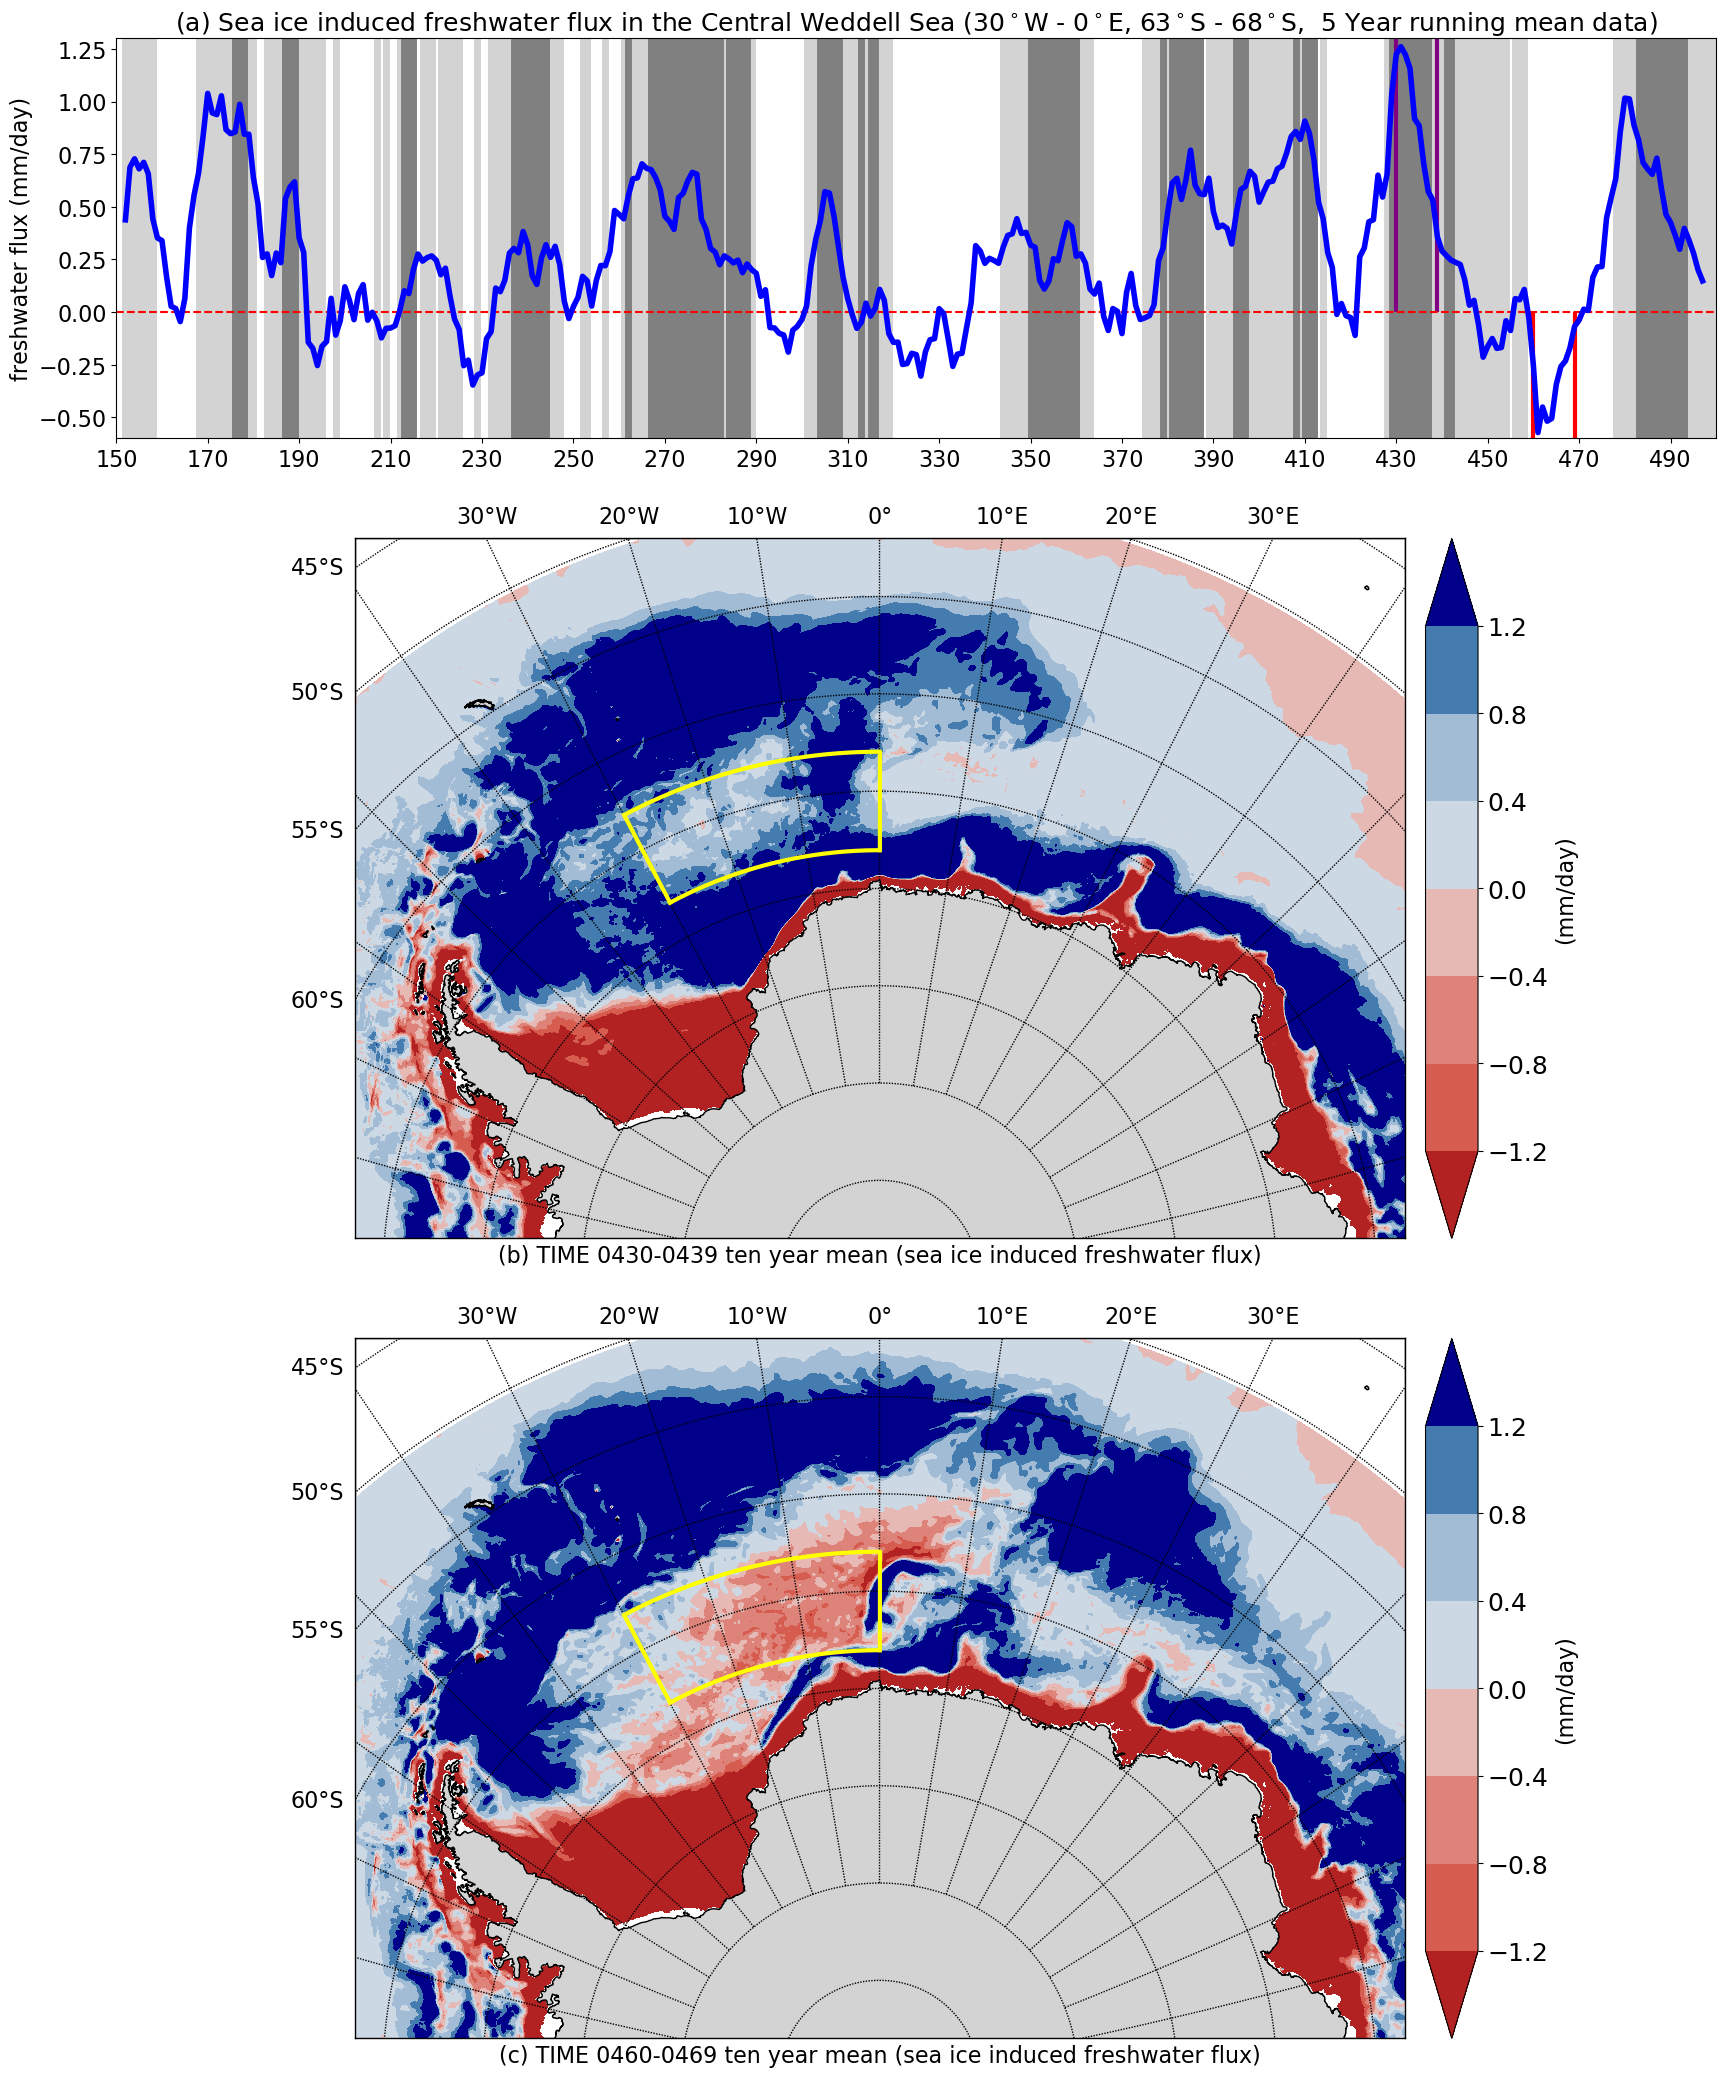

In [12]:
t = np.arange(2,348,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,20), dpi=100)
ax1 = fig.add_axes([0.1, 0.9, 0.8, 0.2],
                    xticklabels=[])
plt.vlines(mrpxx, -0.6, 1.3, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx, -0.6, 1.3, colors = "grey",linewidth=5)

plt.vlines(310, -0.6,0, colors = "red",linewidth=3)
plt.vlines(319, -0.6, 0, colors = "red",linewidth=3)

plt.vlines(280, 0, 1.3, colors = "purple",linewidth=3)
plt.vlines(289, 0, 1.3, colors = "purple",linewidth=3)

ax1.plot(t,-ww2*10,'blue',linewidth=4)
plt.hlines(0, 0, 350, colors = "red",linestyles = "dashed")
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
#plt.yticks(np.arange(-0.6,0.6,0.2), ['-0.6', '-0.4', '-0.2', '0','0.2','0.4','0.6'],**my_font)
plt.yticks(**my_font)
#plt.xlabel('Years',**my_font)
plt.ylabel('freshwater flux (mm/day)',**my_font)
plt.axis("tight")
ax1.set(ylim=(-0.6, 1.3),xlim=(0, 350))
ax1.set_title('(a) Sea ice induced freshwater flux in the Central Weddell Sea (30$^\circ$W - 0$^\circ$E, 63$^\circ$S - 68$^\circ$S,  5 Year running mean data)',fontsize = '18')
#############################################################################
ax3 = fig.add_axes([0.1, 0.1, 0.8, 0.35],
                    xticklabels=[])
map = Basemap(projection='aeqd', lat_0 = -70, lon_0 = 0,area_thresh = 100,\
                     width = 6000000,height = 4000000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,-aveplot*10,levels = nice_levels,cmap = new_cmap,norm =norm,spacing = 'uniform',extend='both')
CP.cmap.set_over('darkblue')
CP.cmap.set_under('firebrick')


x2,y2=map(lont2,latt2)
map.plot(x2,y2,'yellow',linewidth=3)
x3,y3=map(lont3,latt3)
map.plot(x3,y3,'yellow',linewidth=3)
x4,y4=map(lont4,latt4)
map.plot(x4,y4,'yellow',linewidth=3)
x5,y5=map(lont5,latt5)
map.plot(x5,y5,'yellow',linewidth=3)
#CS=map.contour(x,y,plotvar,[700],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=35)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP,extendfrac='auto',ticks=nice_levels)
#cbar.minorticks_on()
cbar.ax.tick_params(labelsize=18) 
cbar.set_label('(mm/day)', **my_font)
plt.xlabel("(c) TIME 0460-0469 ten year mean (sea ice induced freshwater flux)",fontsize = '16')
################################################################
ax3 = fig.add_axes([0.1, 0.5, 0.8, 0.35],
                    xticklabels=[])
map = Basemap(projection='aeqd', lat_0 = -70, lon_0 = 0,area_thresh = 100,\
                     width = 6000000,height = 4000000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,-aveplot2*10,levels = nice_levels,cmap = new_cmap,norm =norm,spacing = 'uniform',extend='both')
CP.cmap.set_over('darkblue')
CP.cmap.set_under('firebrick')

x2,y2=map(lont2,latt2)
map.plot(x2,y2,'yellow',linewidth=3)
x3,y3=map(lont3,latt3)
map.plot(x3,y3,'yellow',linewidth=3)
x4,y4=map(lont4,latt4)
map.plot(x4,y4,'yellow',linewidth=3)
x5,y5=map(lont5,latt5)
map.plot(x5,y5,'yellow',linewidth=3)

#CS=map.contour(x,y,plotvar,[700],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=35)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP,extendfrac='auto',ticks=nice_levels)
#cbar.minorticks_on()
cbar.ax.tick_params(labelsize=18) 
cbar.set_label('(mm/day)', **my_font)
plt.xlabel("(b) TIME 0430-0439 ten year mean (sea ice induced freshwater flux)",fontsize = '16')
plt.savefig("dvidtnew.png",bbox_inches='tight')